<a href="https://colab.research.google.com/github/SuprioDevOjha/Stock_Market_Prediction/blob/main/Stock_Market_Prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import yfinance as yf

In [17]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period='max')
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [18]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24299 entries, 1927-12-30 00:00:00-05:00 to 2024-09-24 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          24299 non-null  float64
 1   High          24299 non-null  float64
 2   Low           24299 non-null  float64
 3   Close         24299 non-null  float64
 4   Volume        24299 non-null  int64  
 5   Dividends     24299 non-null  float64
 6   Stock Splits  24299 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.5 MB


In [19]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-09-11 00:00:00-04:00', '2024-09-12 00:00:00-04:00',
               '2024-09-13 00:00:00-04:00', '2024-09-16 00:00:00-04:00',
               '2024-09-17 00:00:00-04:00', '2024-09-18 00:00:00-04:00',
               '2024-09-19 00:00:00-04:00', '2024-09-20 00:00:00-04:00',
               '2024-09-23 00:00:00-04:00', '2024-09-24 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24299, freq=None)

<Axes: xlabel='Date'>

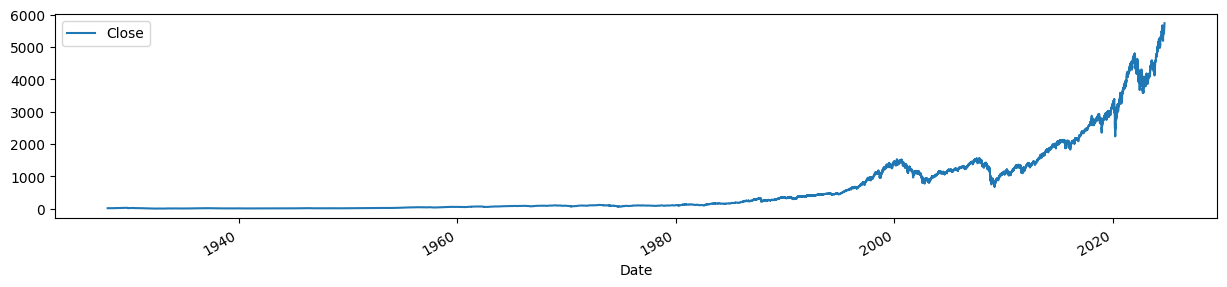

In [20]:
sp500.plot.line(y="Close", use_index = True, figsize=(15,3))

In [21]:
sp500.drop(columns=["Dividends", "Stock Splits"], inplace=True)

In [22]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500.tail()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2024-09-18 00:00:00-04:00,5641.680176,5689.750000,5615.080078,5618.259766,3691390000,5713.640137
2024-09-19 00:00:00-04:00,5702.629883,5733.569824,5686.419922,5713.640137,4024530000,5702.549805
2024-09-20 00:00:00-04:00,5709.640137,5715.140137,5674.490234,5702.549805,7867260000,5718.569824
2024-09-23 00:00:00-04:00,5711.899902,5725.359863,5704.220215,5718.569824,3529550000,5732.990234
2024-09-24 00:00:00-04:00,5727.660156,5735.319824,5698.990234,5732.990234,2449904000,NaN


In [23]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500.tail()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2024-09-18 00:00:00-04:00,5641.680176,5689.750000,5615.080078,5618.259766,3691390000,5713.640137,1
2024-09-19 00:00:00-04:00,5702.629883,5733.569824,5686.419922,5713.640137,4024530000,5702.549805,0
2024-09-20 00:00:00-04:00,5709.640137,5715.140137,5674.490234,5702.549805,7867260000,5718.569824,1
2024-09-23 00:00:00-04:00,5711.899902,5725.359863,5704.220215,5718.569824,3529550000,5732.990234,1
2024-09-24 00:00:00-04:00,5727.660156,5735.319824,5698.990234,5732.990234,2449904000,NaN,0


In [24]:
sp500 = sp500.loc["2000-01-01":].copy()
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1399.420044,0
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1402.109985,1
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1403.449951,1
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1441.469971,1
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1457.599976,1


In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [26]:
from sklearn.metrics import precision_score
import pandas as pd

In [27]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

1.0

In [28]:
preds

,0
Date,
2024-05-02 00:00:00-04:00,1
2024-05-03 00:00:00-04:00,0
2024-05-06 00:00:00-04:00,0
2024-05-07 00:00:00-04:00,0
2024-05-08 00:00:00-04:00,0
...,...
2024-09-18 00:00:00-04:00,0
2024-09-19 00:00:00-04:00,0
2024-09-20 00:00:00-04:00,0


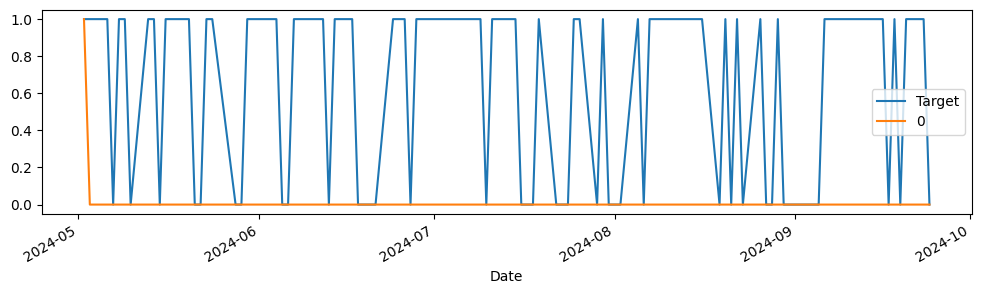

In [30]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot(figsize=(12,3));